In [1]:
import networkx as nx
import pandas as pd
import math
from pprint import pprint
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
import community
import itertools

### Karate Club dataset

In [13]:
df = pd.read_csv("zachary_karate_club.txt", sep=" ", header=None)

#### Create graph

In [14]:
g = nx.Graph()

num_nodes = max(df.max(axis=0)[1], df.max(axis=0)[0]) + 1
g.add_nodes_from(list(range(num_nodes)))

In [15]:
for i in range(len(df)):
    g.add_edge(df.iloc[i][0], df.iloc[i][1], weight=0.1)

#### Detect communities with Girvan Newman algorithm

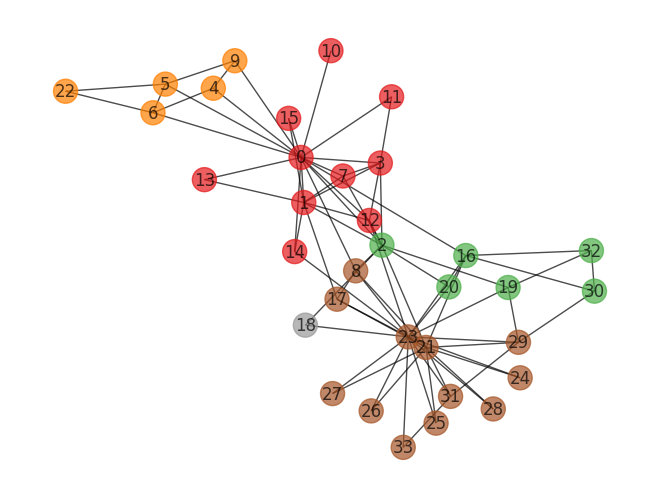

In [16]:
communities = girvan_newman(g)

k = 3 # Step of Girvan Newman algorithm

communities = [list(community) for community in next(itertools.islice(communities, k, None))]
colors = {node: i for i, nodes in enumerate(communities) for node in nodes}
colors = [colors[i] for i in range(num_nodes)]

layout = nx.spring_layout(g, seed=4)
nx.draw(g, layout, cmap = plt.cm.Set1, node_color=colors, with_labels=True, node_size=300, alpha=0.7)

#### Detect communities with Louvain algorithm

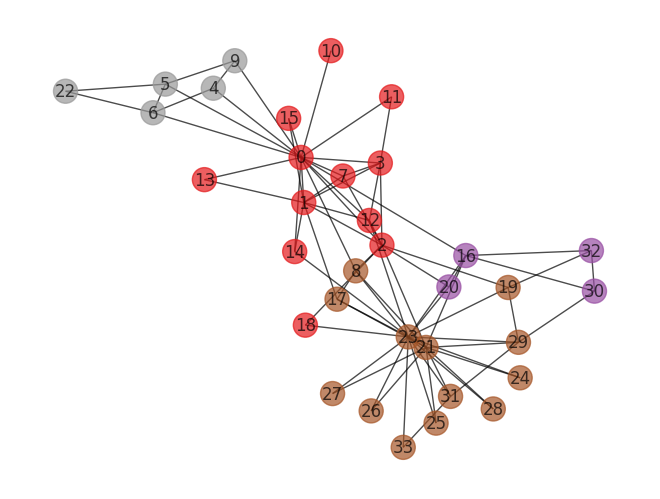

In [17]:
part = community.best_partition(g, random_state=43)
colors = [part.get(node) for node in g.nodes()]
layout = nx.spring_layout(g, seed=4)
nx.draw(g, layout, cmap = plt.cm.Set1, node_color=colors, with_labels=True, node_size=300, alpha=0.7)

### Who talks to whom dataset

#### Load dataset

In [18]:
df = pd.read_excel("who_talks_to_whom.xlsx")
df = df.drop('Nodes', axis=1)

#### Create graph from data

In [19]:
g = nx.Graph()
g.add_nodes_from([i for i in range(len(df))])

for i in range(len(df)):
    for j, v in enumerate(df.iloc[i]):
        if v != "-" and not math.isnan(v) and i != j:
            g.add_edge(i, j, weight=0.01)

#### Detect communities with Girvan Newman algorithm

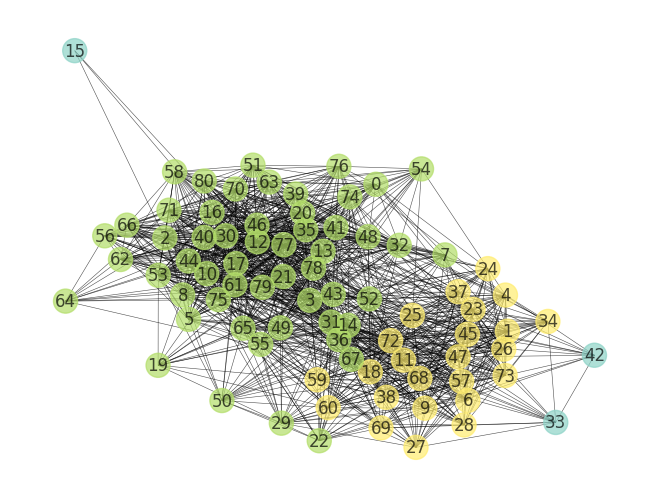

In [20]:
communities = girvan_newman(g)

k = 3 # Step of Girvan Newman algorithm

communities = [list(community) for community in next(itertools.islice(communities, k, None))]
colors = {node: i if len(nodes) > 1 else -1 for i, nodes in enumerate(communities) for node in nodes}
colors = [colors[i] for i in range(len(df))]

layout = nx.spring_layout(g, seed=4)
nx.draw(g, layout, cmap = plt.cm.Set3, node_color=colors, with_labels=True, node_size=300, alpha=0.7,
       width=0.4)

#### Detect communities with Louvain algorithm

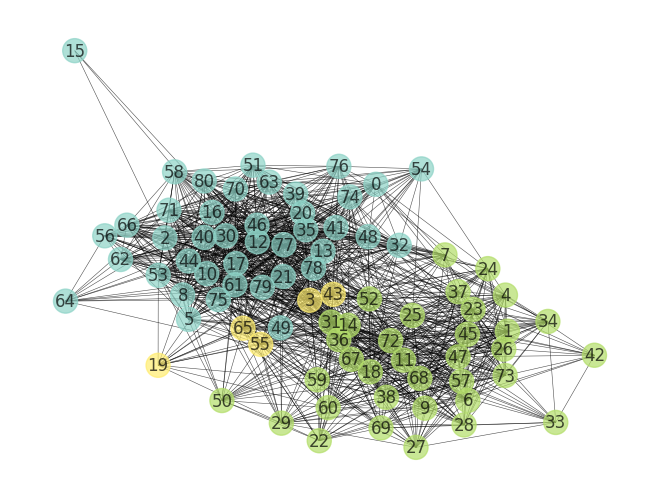

In [21]:
part = community.best_partition(g, random_state=42)
colors = [part.get(node) for node in g.nodes()]
colors = [color if colors.count(color) > 1 else -1 for color in colors]
layout = nx.spring_layout(g, seed=4)
nx.draw(g, layout, cmap = plt.cm.Set3, node_color=colors, with_labels=True, node_size=300, alpha=0.7,
       width=0.4)

### Analysis and insights
Louvain detects 3 clusters, while GN finds only 2 major clusters and then starts cutting off single nodes in later steps. It is important to note that with some seeds the number of cluster coming from the Louvain algorithm is 3 and with some it is 2. 

By visually comparing the clusters we see some similarities and differences.

Similarities:
- cluster in upper-left corner
- cluster in lower-right corner

Differences:
- small central cluster from Louvain is missing in the result of GN.
- cluster borders are positined differently: in GN it is lower making the lower-right graph smaller

GN cuts off peripheral nodes (22, 29, 50, ...) after step 3, making further splitting nonsensical. Both algorithms suggest there are 2 major clusters in the corners of the graph, hinting at the fact that this might represent actual clusters in real life. 

The 2 major clusters might be explained by e.g. home region (e.g. asian and other students) or might correspond to the first language spoken by students (e.g. chinese and other languages). Another theory is that the clusters are formed due to electives chosen by students, but this is less probable, as there are only 2 major groups.

It is more difficult to explain the small cluster in the middle coming from the Louvain algorithm, but because of their centrality we can guess that these students are class representatives. They're communicating actively with both groups of students and thus have central positin in spring layout.

Nodes 15, 33 and 42 that are cut off in the first steps of the GN algorithm should not be interpreted as these are just the noise of the algorithm. Girvan Newman tends to cut off nodes that have few edges because that means that all shortest paths from and to this node go through these edges and give them high betweenness centrality. These nodes are usually depicted on the periphery when using the spring layout.